In [1]:
#prompt: imports the following modules with their respective aliases: pandas, matplotlib, seaborn, google colab drive, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive (opcional)
import warnings

#drive.mount("/content/Drive") (opcional)
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [3]:
df_banco = pd.read_csv('german_credit.csv')
df_banco.head()

default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   

                   personal_status_sex other_debtors  present_res_since  \
0                        male : single          none                  4   
1  female : divorced/separated/married          none                  2   
2                        male : single          none                  3   
3                        male : single     guarantor                  4   
4                        male : single          none                  4   

                                            property  age  \
0                                        real estate   67   
1                                        real estate   22   
2                                        real estate   49   
3  if not A121 : building society savings agreeme...   45   
4                              unknown / no property   53   

  other_installment_plans   housing  credits_this_bank  \
0                    none       own                  2   
1                    none       own                  1   
2                    none       own                  1   
3                    none  for free                  1   
4                    none  for free                  2   

                           job  people_under_maintenance  \
0  skilled employee / official                         1   
1  skilled employee / official                         1   
2         unskilled - resident                         2   
3  skilled employee / official                         2   
4  skilled employee / official                         2   

                                   telephone foreign_worker  
0  yes, registered under the customers name             yes  
1                                       none            yes  
2                                       none            yes  
3                                       none            yes  
4                                       none            yes

In [4]:
df_banco.shape

(1000, 21)

In [5]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [7]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [8]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [9]:
# dic = {'yes':1,'no':0}
# df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
# df_banco['foreign_worker']

In [10]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [11]:
procesar_datos()
df_banco.sample(3)

default  account_check_status  duration_in_month  credit_history  \
404        0                     2                 18               4   
606        0                     4                 24               5   
987        0                     4                 13               3   

     purpose  credit_amount  savings  present_emp_since  \
404        1           2899        1                  1   
606       10           4526        5                  3   
987        5           1409        4                  5   

     installment_as_income_perc  personal_status_sex  other_debtors  \
404                           4                    3              1   
606                           3                    3              1   
987                           2                    2              1   

     present_res_since  property  age  other_installment_plans  housing  \
404                  4         3   43                        3        2   
606                  2         1   74                        3        2   
987                  4         1   64                        3        2   

     credits_this_bank  job  people_under_maintenance  telephone  \
404                  1    3                         2          0   
606                  1    4                         1          1   
987                  1    3                         1          0   

     foreign_worker  
404               1  
606               1  
987               1

In [12]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

personal_status_sex  age  duration_in_month  credit_amount  default
997                    3   38                 12            804        0
998                    3   23                 45           1845        1
999                    3   27                 45           4576        0

In [13]:
# dic_sexo = {2:1,5:1,1:0,3:0,4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [14]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [15]:
feature_engineering()
df_banco.head(2)

default  account_check_status  credit_history  purpose  savings  \
0        0                     1               5        5        1   
1        1                     2               3        5        5   

   present_emp_since  installment_as_income_perc  other_debtors  \
0                  1                           4              1   
1                  3                           2              1   

   present_res_since  property  other_installment_plans  housing  \
0                  4         1                        3        2   
1                  2         1                        3        2   

   credits_this_bank  job  people_under_maintenance  telephone  \
0                  2    3                         1          1   
1                  1    3                         1          0   

   foreign_worker  sexo  estado_civil  rango_edad  rango_plazos_credito  \
0               1     0             1           5                     1   
1               1     1             0           1                     4   

   rango_valor_credito  
0                    2  
1                    6

In [16]:
df_banco.describe()

default  account_check_status  credit_history      purpose  \
count  1000.000000           1000.000000      1000.00000  1000.000000   
mean      0.300000              2.577000         3.54500     4.277000   
std       0.458487              1.257638         1.08312     2.739302   
min       0.000000              1.000000         1.00000     1.000000   
25%       0.000000              1.000000         3.00000     2.000000   
50%       0.000000              2.000000         3.00000     4.000000   
75%       1.000000              4.000000         5.00000     5.000000   
max       1.000000              4.000000         5.00000    10.000000   

           savings  present_emp_since  installment_as_income_perc  \
count  1000.000000        1000.000000                 1000.000000   
mean      3.895000           2.616000                    2.973000   
std       1.580023           1.208306                    1.118715   
min       1.000000           1.000000                    1.000000   
25%       3.000000           1.000000                    2.000000   
50%       5.000000           3.000000                    3.000000   
75%       5.000000           3.000000                    4.000000   
max       5.000000           5.000000                    4.000000   

       other_debtors  present_res_since     property  other_installment_plans  \
count    1000.000000        1000.000000  1000.000000              1000.000000   
mean        1.145000           2.845000     2.358000                 2.675000   
std         0.477706           1.103718     1.050209                 0.705601   
min         1.000000           1.000000     1.000000                 1.000000   
25%         1.000000           2.000000     1.000000                 3.000000   
50%         1.000000           3.000000     2.000000                 3.000000   
75%         1.000000           4.000000     3.000000                 3.000000   
max         3.000000           4.000000     4.000000                 3.000000   

           housing  credits_this_bank          job  people_under_maintenance  \
count  1000.000000        1000.000000  1000.000000               1000.000000   
mean      1.929000           1.407000     2.904000                  1.155000   
std       0.531264           0.577654     0.653614                  0.362086   
min       1.000000           1.000000     1.000000                  1.000000   
25%       2.000000           1.000000     3.000000                  1.000000   
50%       2.000000           1.000000     3.000000                  1.000000   
75%       2.000000           2.000000     3.000000                  1.000000   
max       3.000000           4.000000     4.000000                  2.000000   

         telephone  foreign_worker         sexo  estado_civil   rango_edad  \
count  1000.000000     1000.000000  1000.000000    1000.00000  1000.000000   
mean      0.404000        0.963000     0.310000       0.54800     2.027000   
std       0.490943        0.188856     0.462725       0.49794     1.136469   
min       0.000000        0.000000     0.000000       0.00000     1.000000   
25%       0.000000        1.000000     0.000000       0.00000     1.000000   
50%       0.000000        1.000000     0.000000       1.00000     2.000000   
75%       1.000000        1.000000     1.000000       1.00000     3.000000   
max       1.000000        1.000000     1.000000       1.00000     6.000000   

       rango_plazos_credito  rango_valor_credito  
count           1000.000000          1000.000000  
mean               1.975000             3.766000  
std                0.968149             2.821206  
min                1.000000             1.000000  
25%                1.000000             2.000000  
50%                2.000000             3.000000  
75%                2.000000             4.000000  
max                6.000000            19.000000

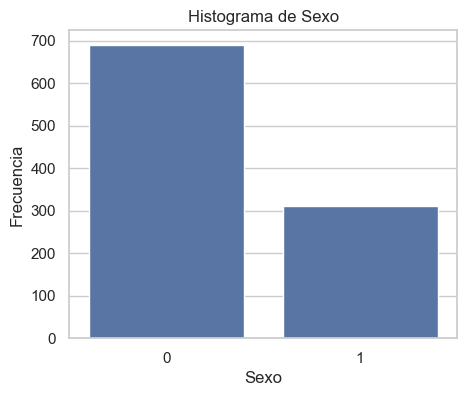

In [17]:
# Configurar el estilo de Seaborn 
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Show histogram
plt.show()

In [18]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

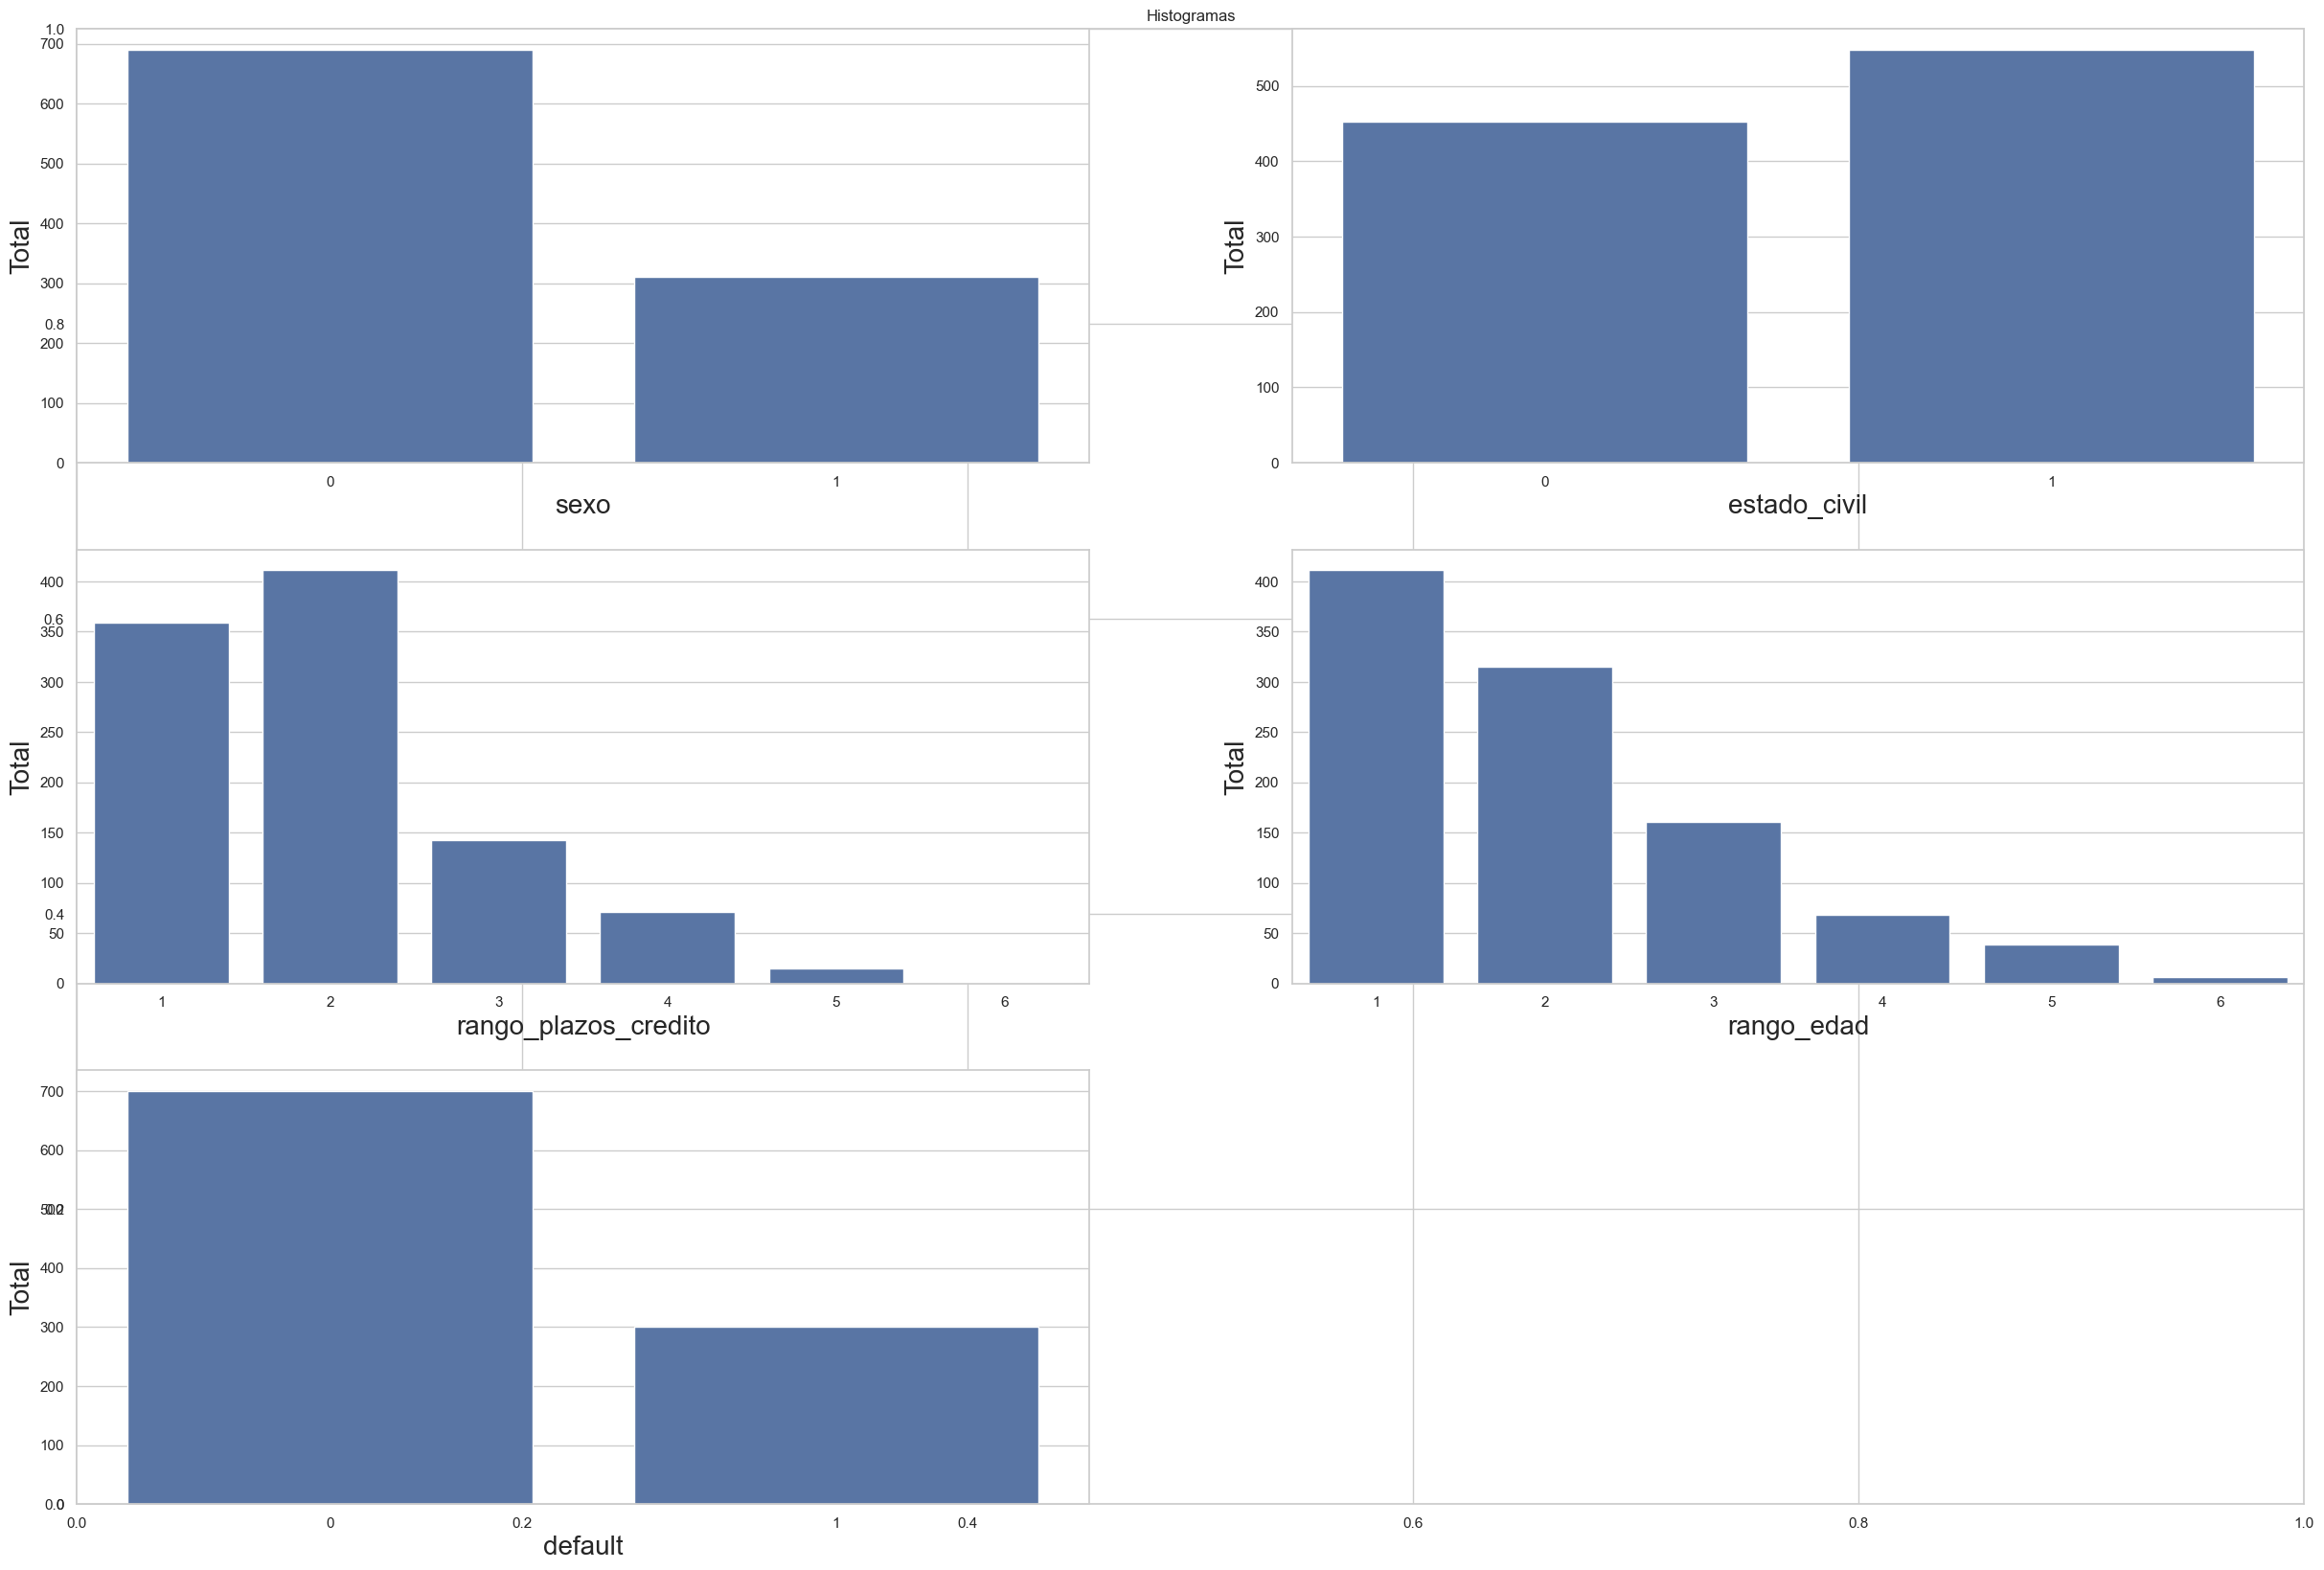

In [19]:
analisis_exploratorio()

# 1. Analyze the data from the distributions and identify if there are any values ​​or records that should not be considered for the model

           default  account_check_status  credit_history      purpose  \
count  1000.000000           1000.000000      1000.00000  1000.000000   
mean      0.300000              2.577000         3.54500     4.277000   
std       0.458487              1.257638         1.08312     2.739302   
min       0.000000              1.000000         1.00000     1.000000   
25%       0.000000              1.000000         3.00000     2.000000   
50%       0.000000              2.000000         3.00000     4.000000   
75%       1.000000              4.000000         5.00000     5.000000   
max       1.000000              4.000000         5.00000    10.000000   

           savings  present_emp_since  installment_as_income_perc  \
count  1000.000000        1000.000000                 1000.000000   
mean      3.895000           2.616000                    2.973000   
std       1.580023           1.208306                    1.118715   
min       1.000000           1.000000                    1.000000 

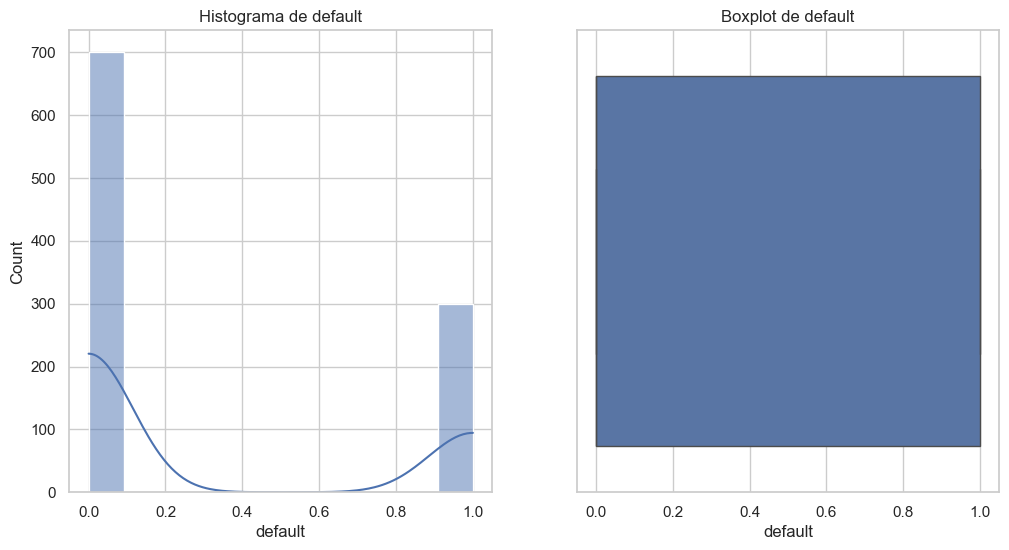

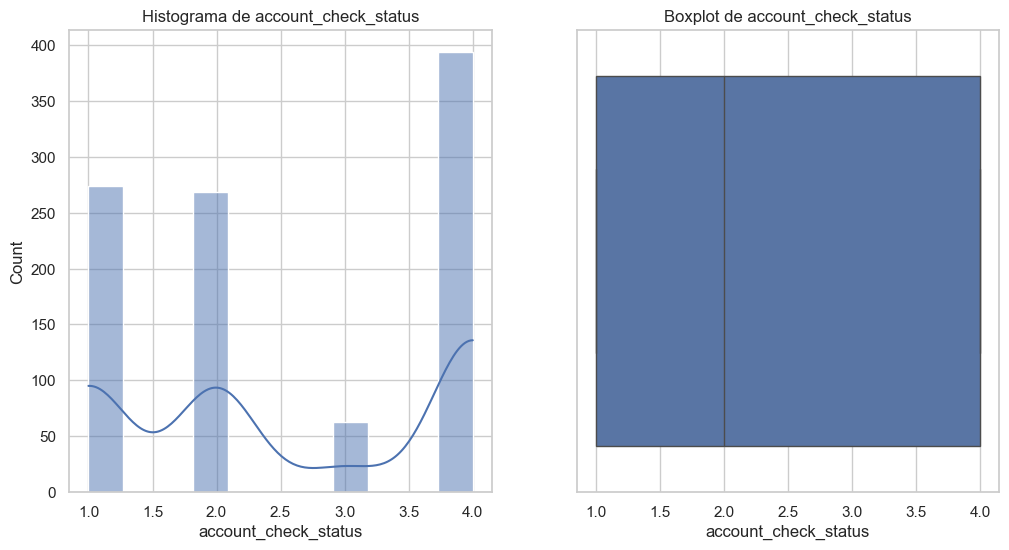

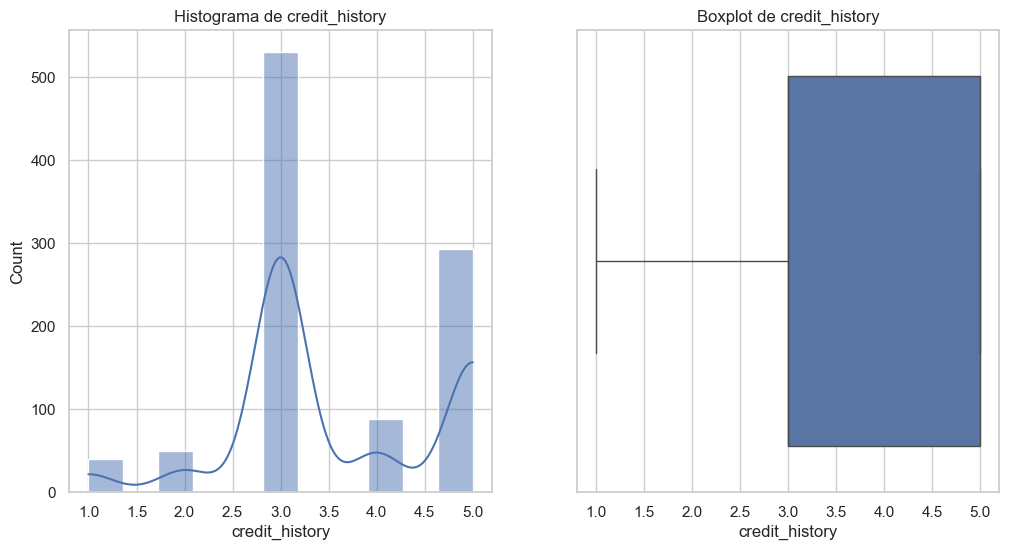

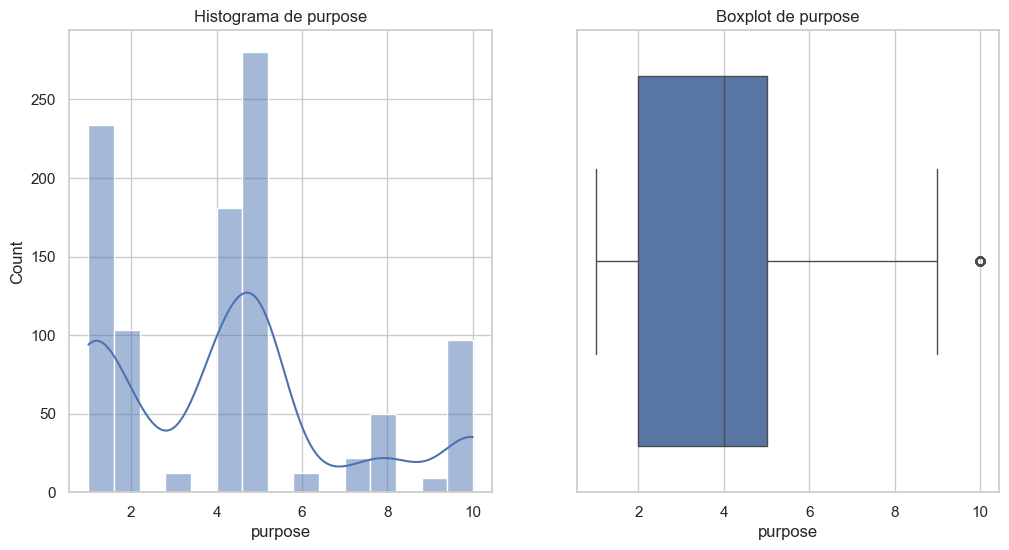

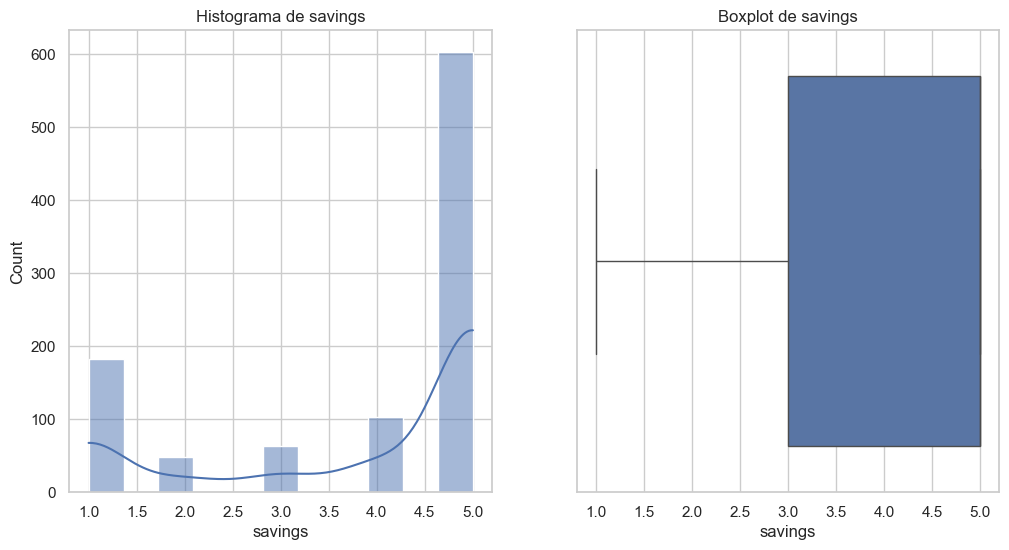

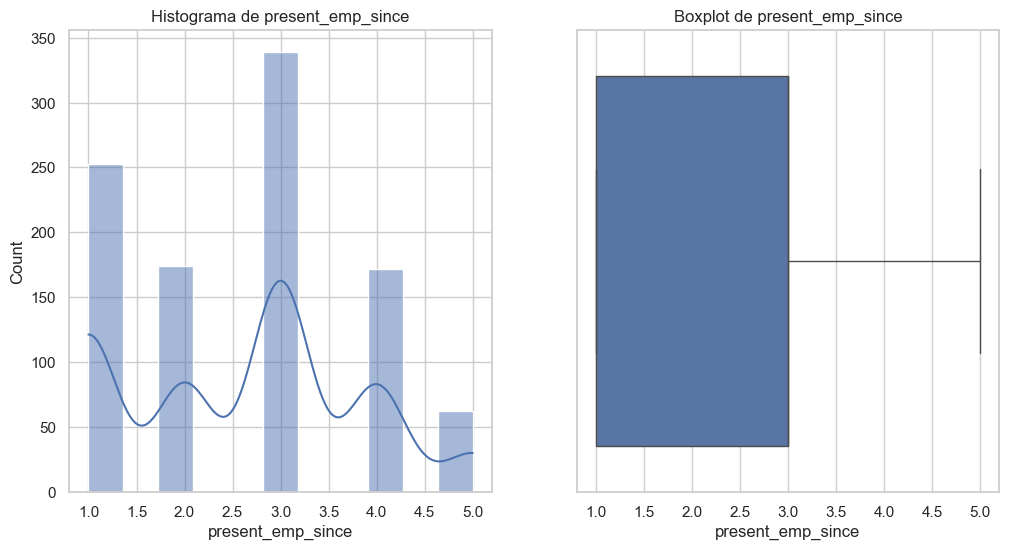

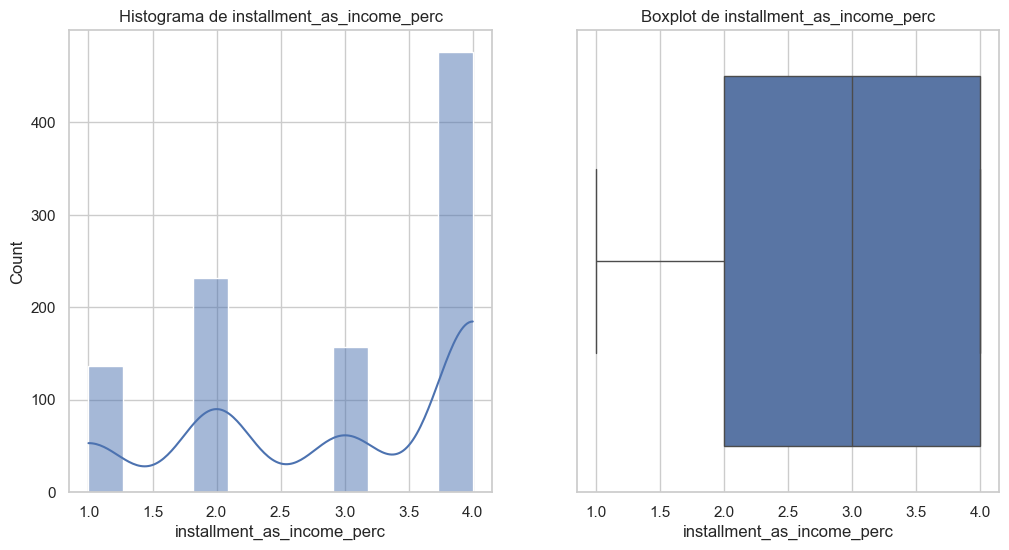

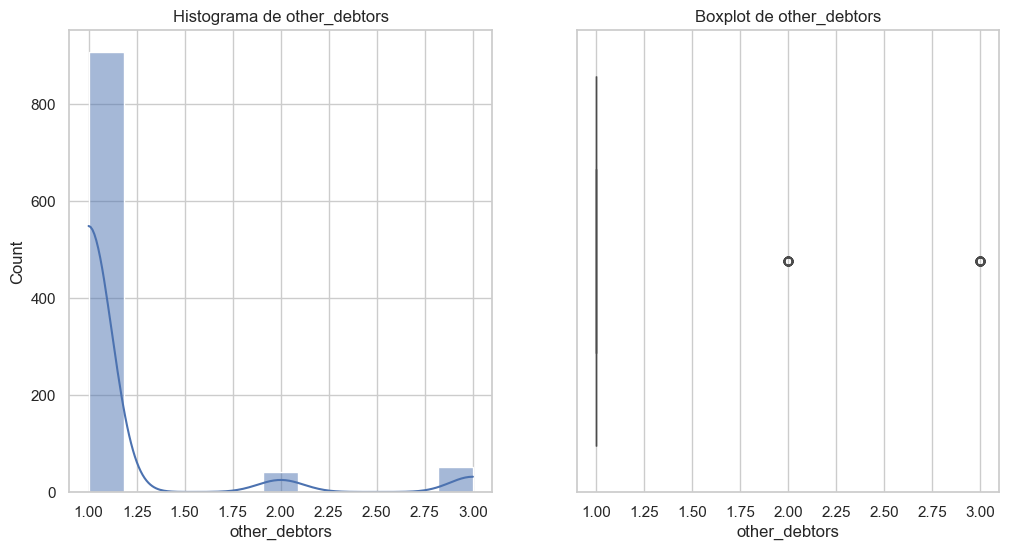

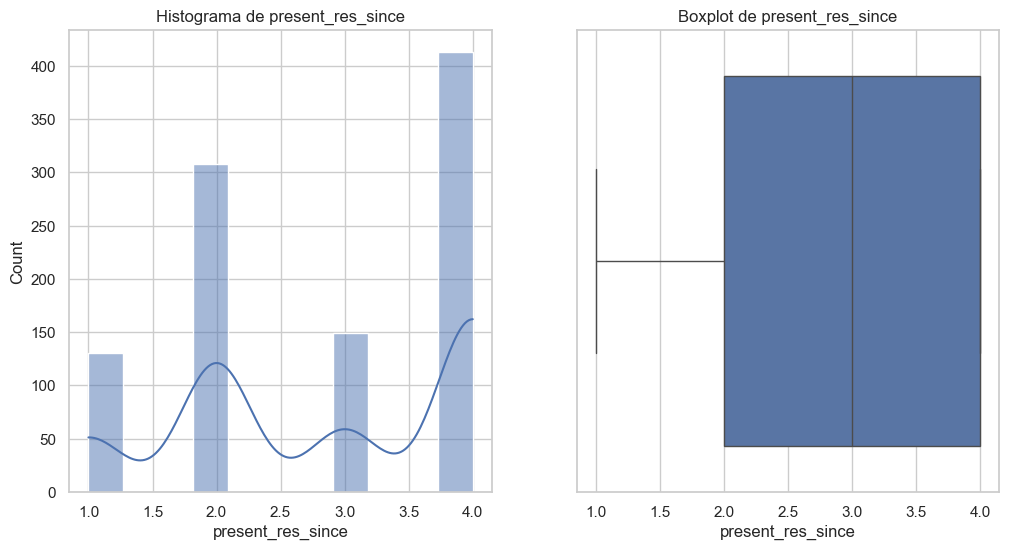

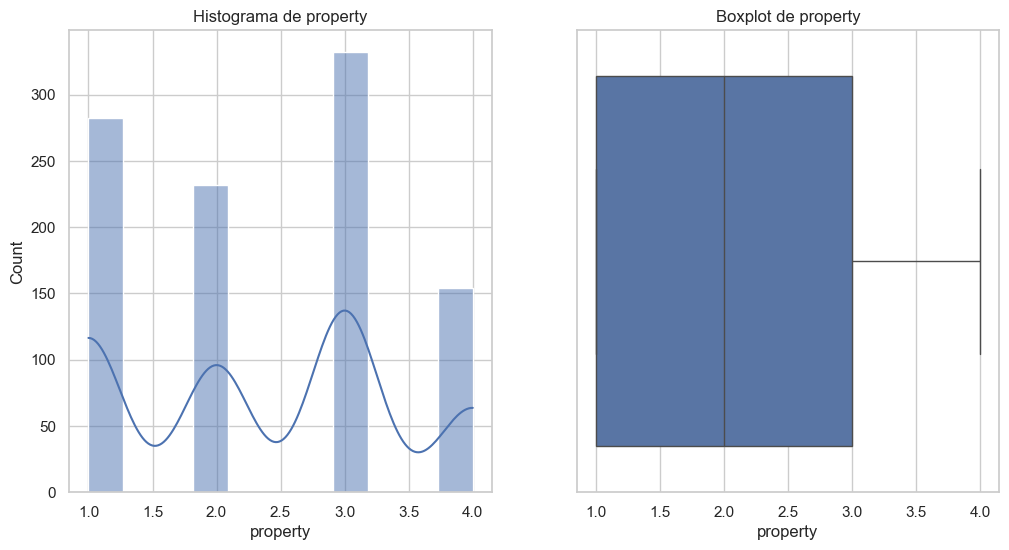

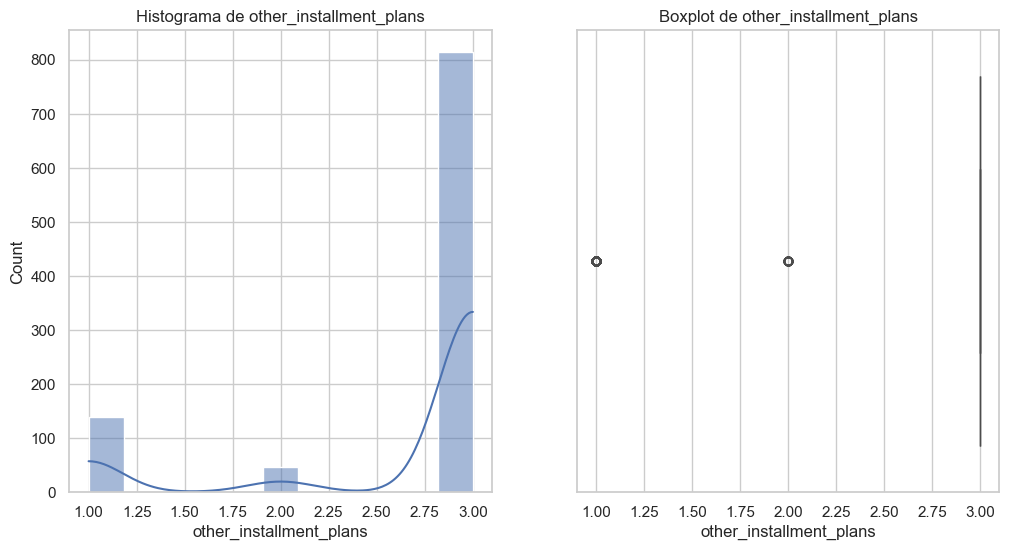

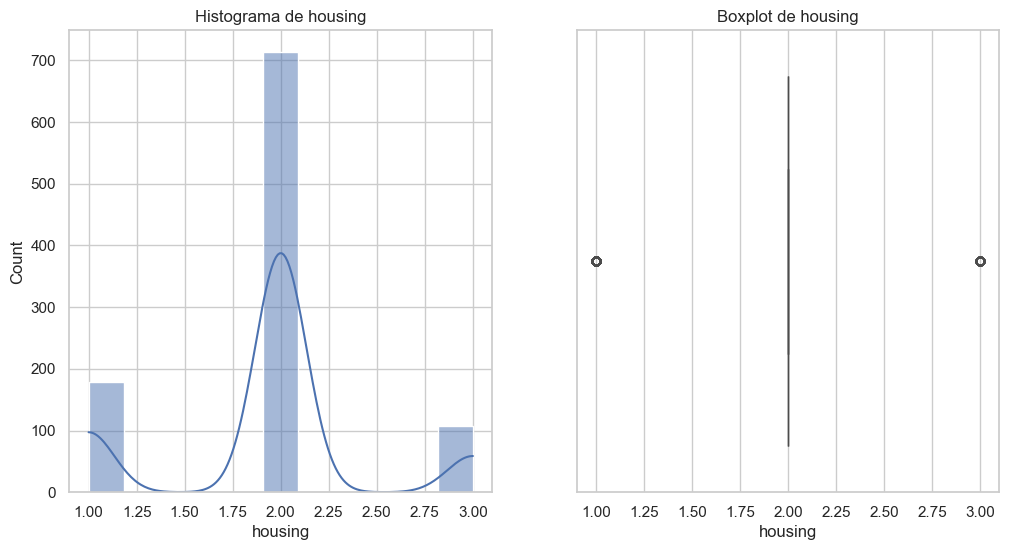

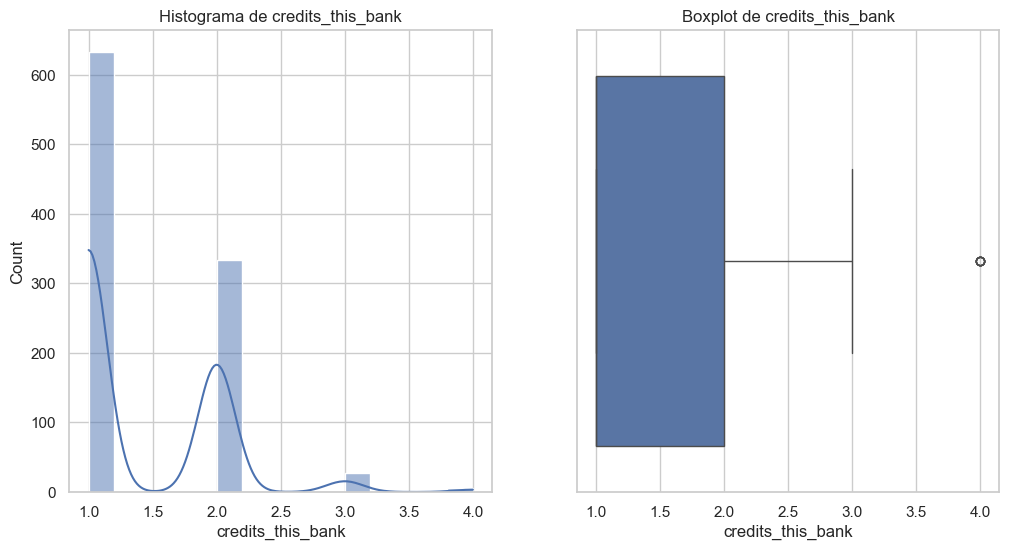

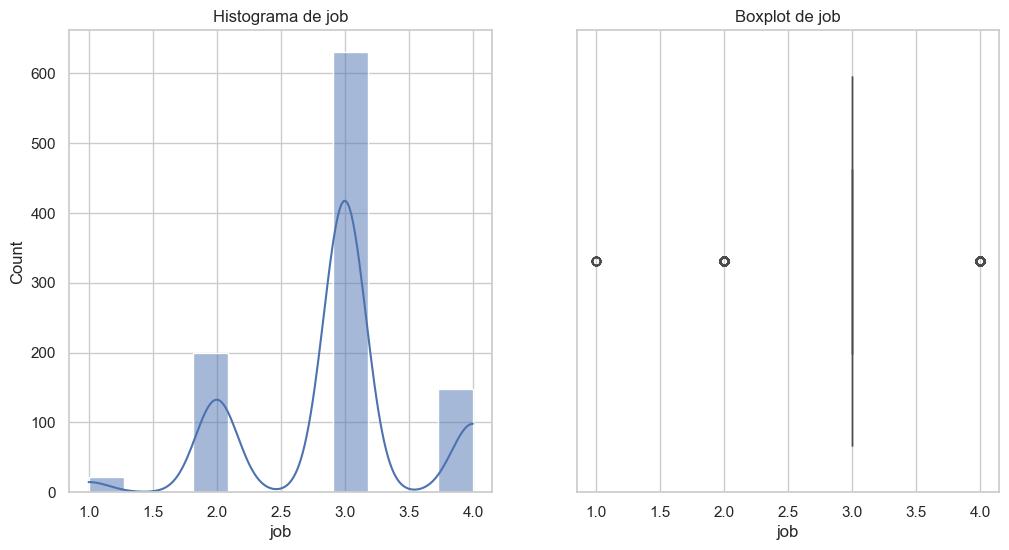

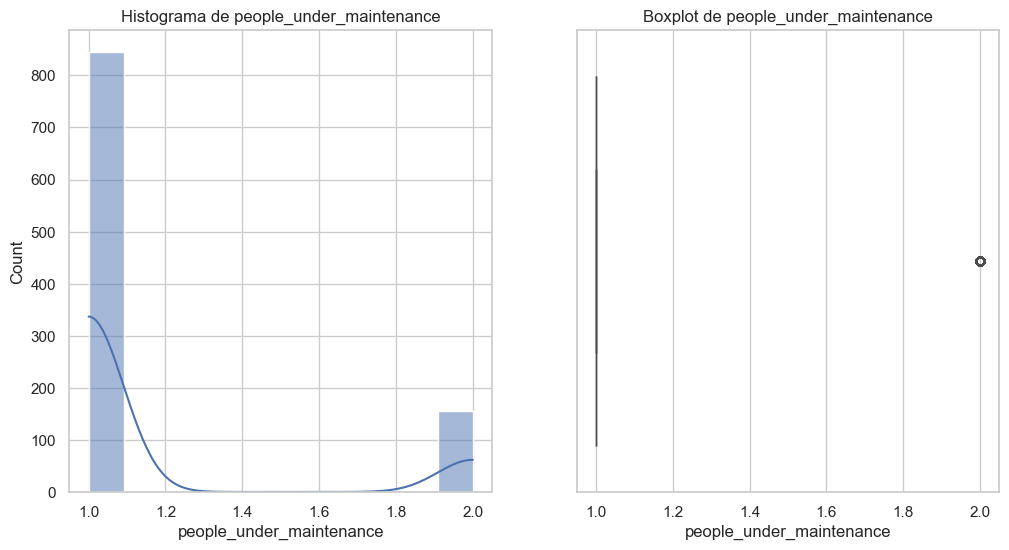

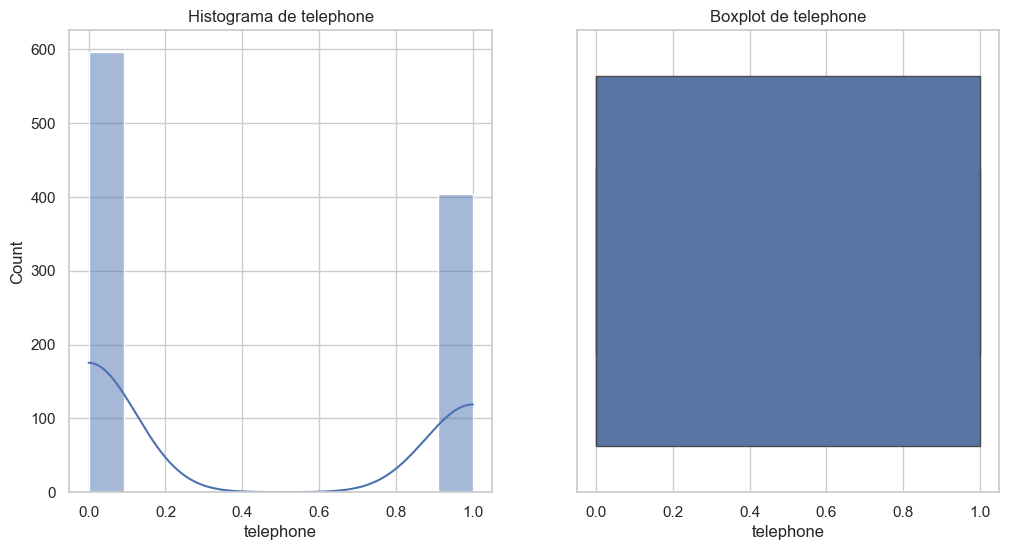

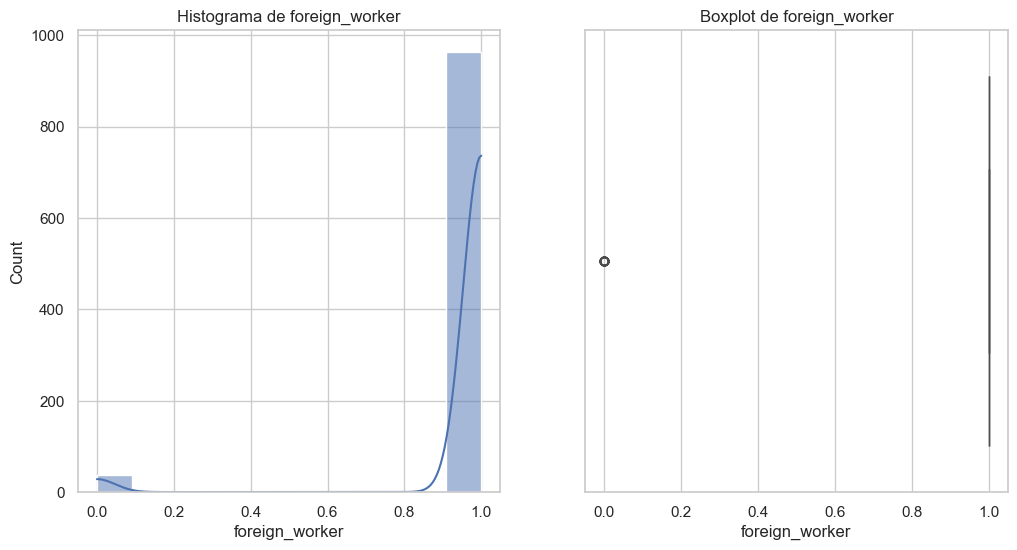

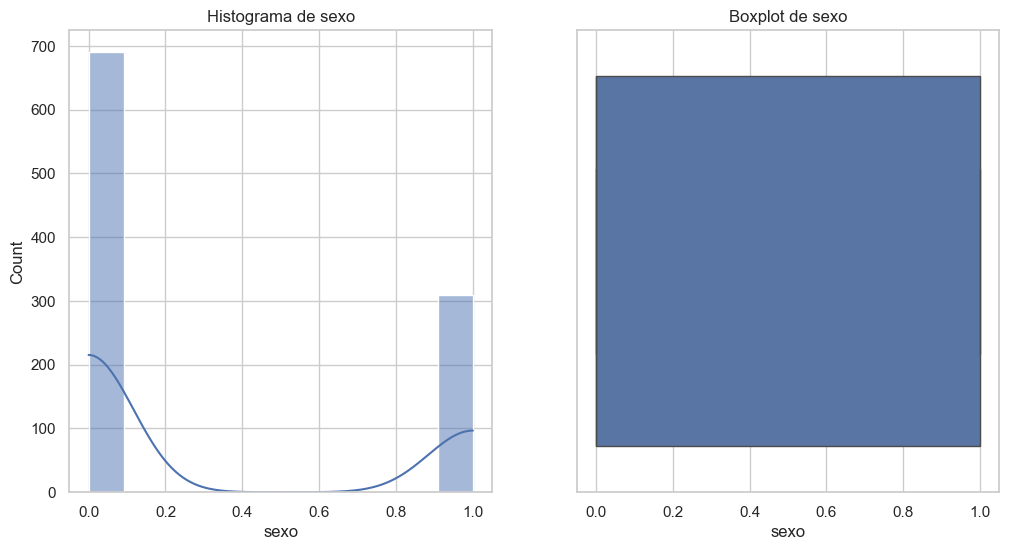

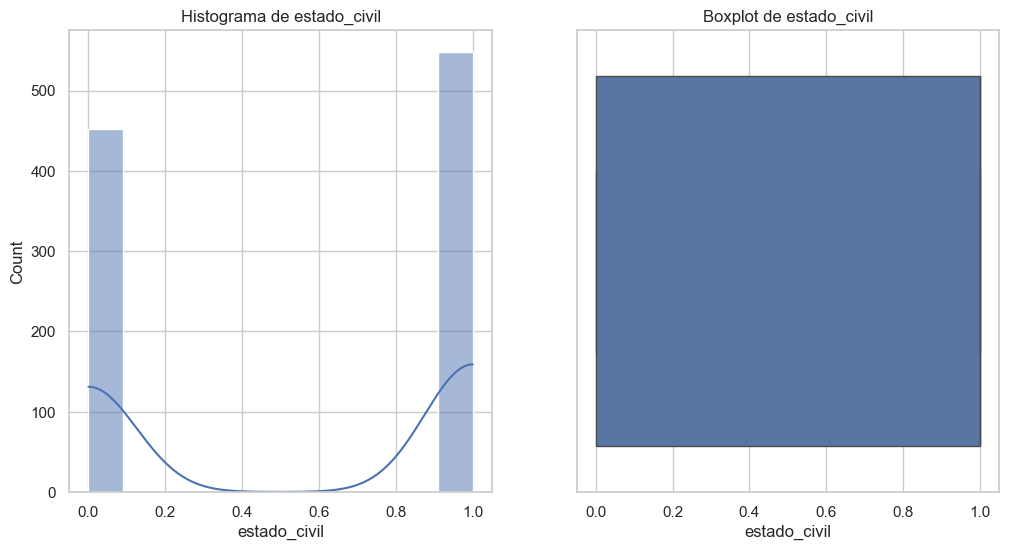

In [20]:
print(df_banco.describe())

# 2. Visualize distributions
for column in df_banco.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 6))
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_banco[column], kde=True)
    plt.title(f'Histograma de {column}')
    
    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_banco[column])
    plt.title(f'Boxplot de {column}')
    
    plt.show()


In the analysis of histograms, such as age ranges and data taken from credit term ranges, I arrived at the following conclusions:
1. 
In the credit term range, we should not consider terms from 60 to 72 months because there was only one customer who took out a loan for that duratio

2. .
We should exclude individuals who take out loans of 11,000 and 20,000 DM, as there are very few customers who borrow that amou

3. t.
In terms of age, people between 60 and 80 years old typically do not take out bank loans..


# 2. Investigate what a heat map is and how to create one to analyze the correlation of variables.

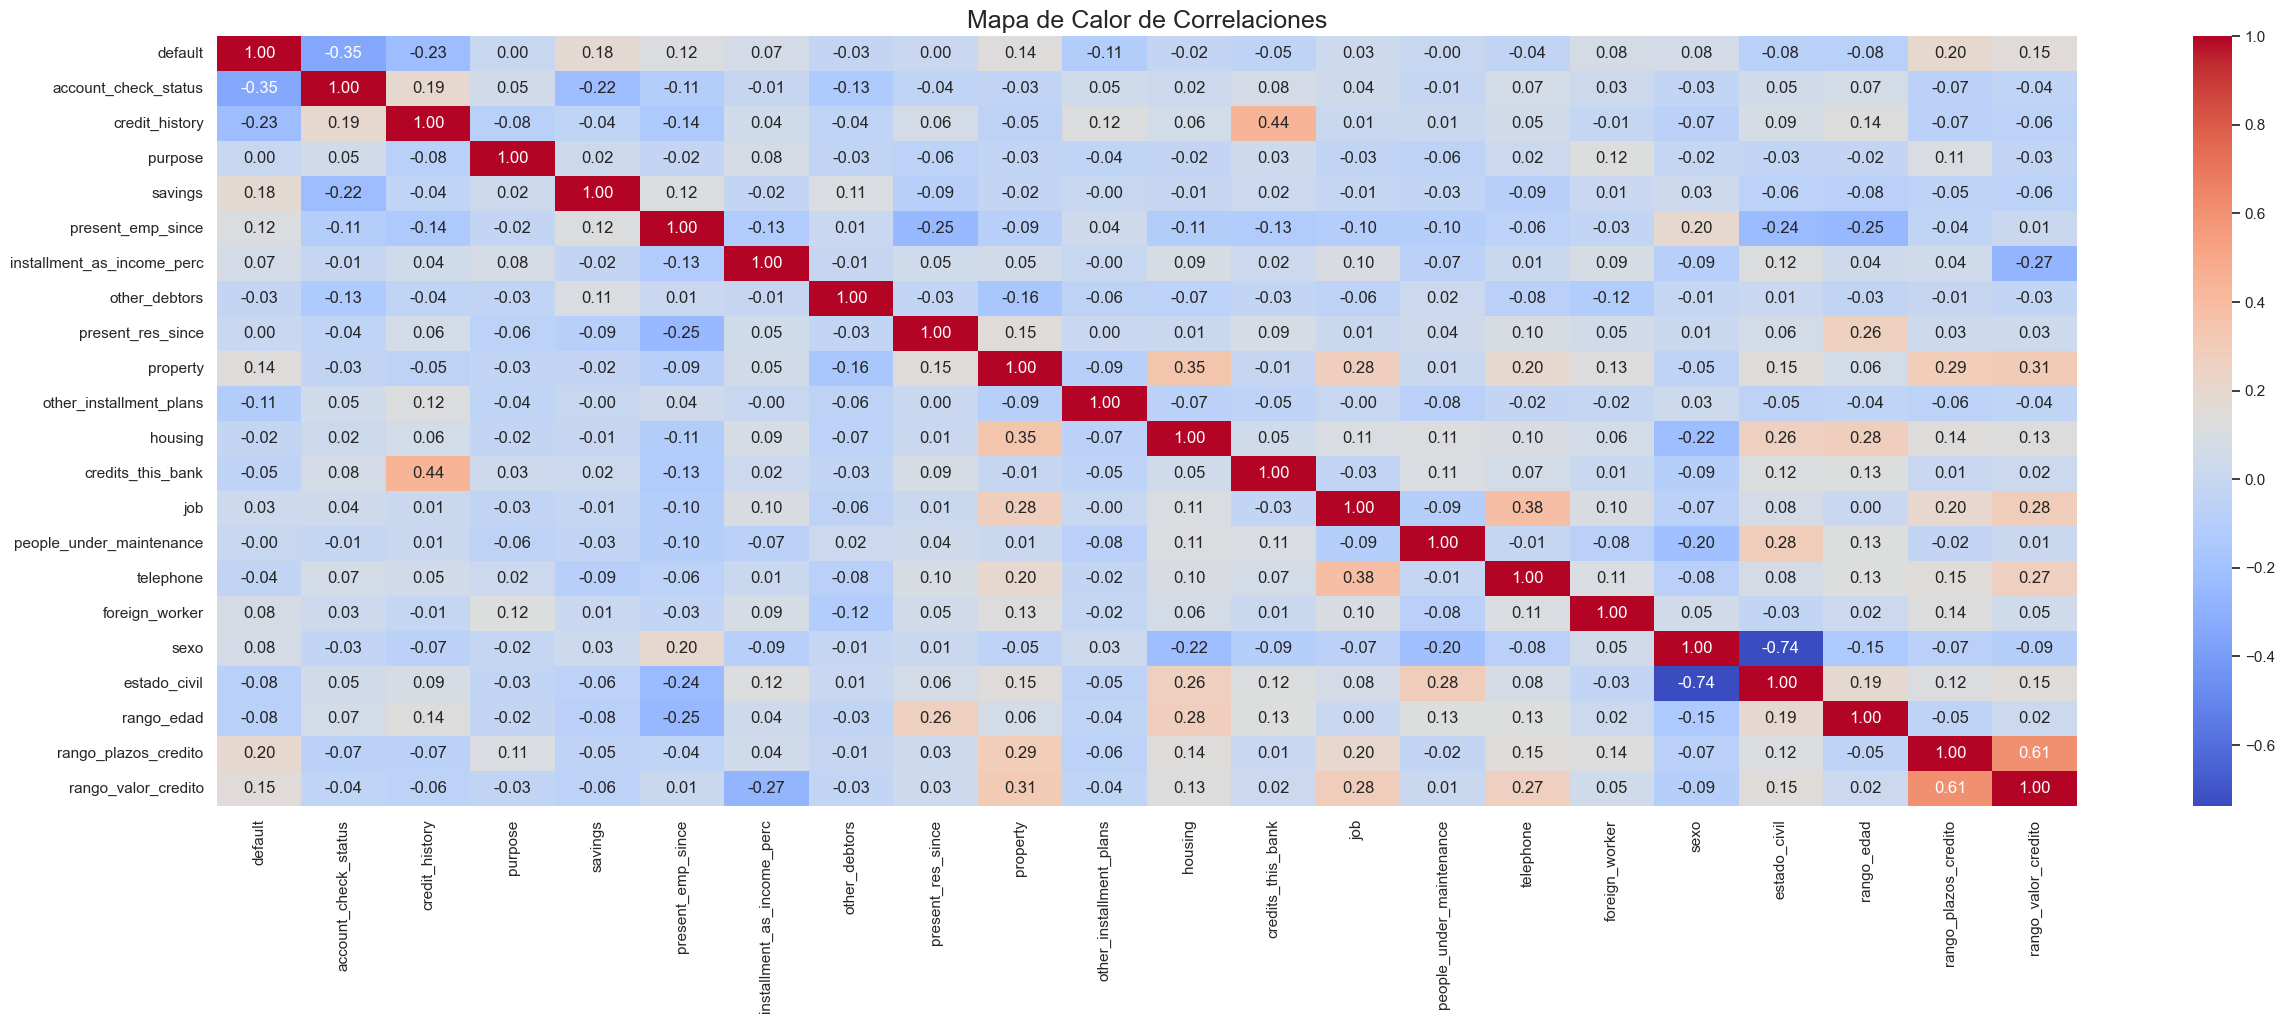

In [21]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

# 3. Create a conclusion for each of the histogram graphs. Look at the data and draw conclusions, because it is an essential skill.

1. Gender Graph: 70% of the customers are men, and 30% are women.

2. 
Marital Status Graph: The graph shows that the vast majority of people requesting a loan are married/divorced/widowed. This is likely because living with a partner often involves additional responsibilities due to children or other family members. In contrast, single individuals tend to take out loans for personal expenses

3. 
Loan Amount Range Graph: The most common loan term is 12 months (2), with a gradual decrease in frequency for longer terms. Regarding loan amounts, there is a higher concentration of customers taking out loans between 1000 and 2000 DM. Beyond that range, the number of clients decrease

4. .
Age Graph: Young people between 18 and 30 years old are the most frequent loan applicants. Older individuals request fewer loa

5. s.
Creditworthiness: Currently, the bank has a large number of good customers, accounting for 70% of applicants. These customers qualify for loans. However, there is a 30% segment of individuals who do not meet the criteria for a loan. Factors affecting creditworthiness include age, previous loans, employment status, and housing situation, with some having a poor credit history.o.


# 4. Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [23]:
# example of a machine learning classification model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Evaluate the model
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

Accuracy: 0.772


In [24]:
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [25]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7066666666666667
0.48717948717948717
0.4418604651162791
0.4634146341463415
0.6274722886329058


Random Forest
0.7966666666666666
0.7358490566037735
0.45348837209302323
0.5611510791366906
0.7911866985437948


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




# 5. Model Evaluation and Selection

In [26]:
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()


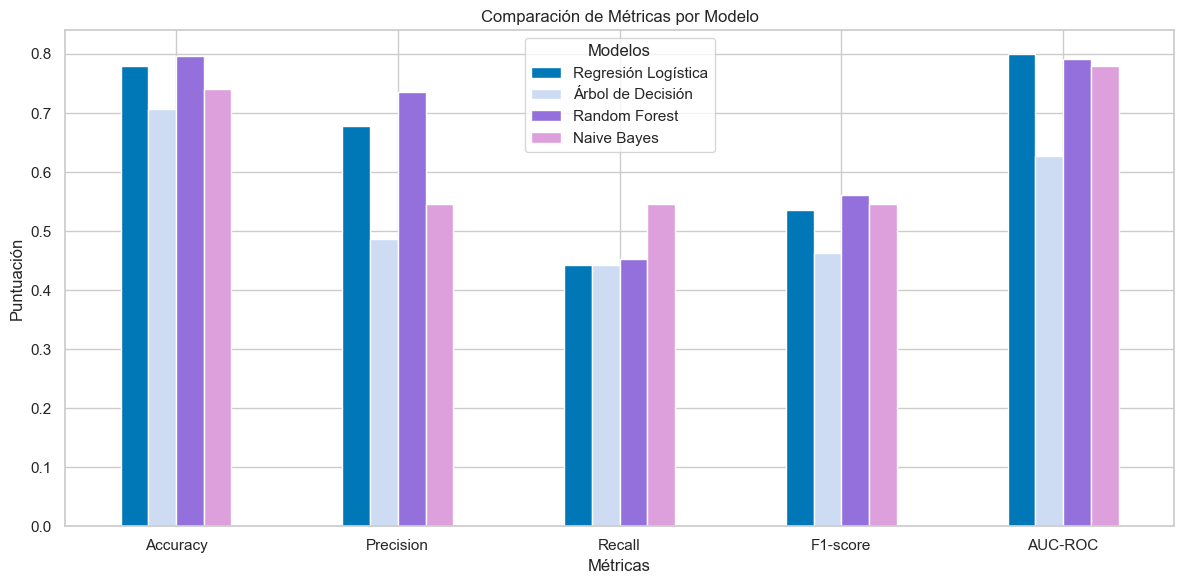

In [27]:
visualiza_resultados()

# 6.Evaluate the Confusion Matrix

In [29]:
#First, the sklearn library is imported
from sklearn.metrics import confusion_matrix

#A function is then created to handle it
def evaluar(df_banco):
    y = df_banco['default']
    X = df_banco.drop(columns='default')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }
# A for is understood to handle data as true positives or negatives and
# false negatives or positives,
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Matriz de Confusión para {name}:\n{cm}\n")

# The function to deal with the original data frame is called
evaluar(df_banco)

Matriz de Confusión para Regresión Logística:
[[196  18]
 [ 48  38]]

Matriz de Confusión para Árbol de Decisión:
[[179  35]
 [ 49  37]]

Matriz de Confusión para Random Forest:
[[197  17]
 [ 48  38]]

Matriz de Confusión para Naive Bayes:
[[175  39]
 [ 39  47]]



As a result, we can deduce that the information would be handled as follows:

True Positive, False Negative

False Positive, True Negative

Therefore, the regression is incorrectly predicting the positive class. The decision tree has a high number of false data points, while the random forest has fewer false negatives, making it better compared to the others. Naive Bayes is balanced but should have some inclination. In conclusion, from this perspective, the random forest is consistent in this case.ectiva

# 7. Balancing the targarg variable

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
def crea_modelos_balanced():
    global df_banco, resultados

    y = df_banco['default']
    X = df_banco.drop(columns='default')

    # Apply SMOTE to balance classes
    smote = SMOTE(random_state=77)
    X_res, y_res = smote.fit_resample(X, y)

    train_x, test_x, train_y, test_y = train_test_split(X_res, y_res, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

# Run the function to create balanced models
crea_modelos_balanced()

# Show results
for i, model in enumerate(resultados['Model']):
    print(model)
    print('Accuracy:', resultados['Accuracy'][i])
    print('Precision:', resultados['Precision'][i])
    print('Recall:', resultados['Recall'][i])
    print('F1-score:', resultados['F1-score'][i])
    print('AUC-ROC:', resultados['AUC-ROC'][i])
    print('\n')

# View results
def visualiza_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)

    # Transpose the DataFrame for easier rendering
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3', '#9370DB', '#DDA0DD']

    # Adjust the size of the figure and add space for the legend
    fig, ax = plt.subplots(figsize=(12, 8))
    results_df.plot(kind='bar', ax=ax, colormap='viridis', rot=0, color=colors)

    # Setting up the title and labels
    plt.title('Comparación de Métricas por Modelo (Balanceado)')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=2) 

    plt.show()

    from IPython.display import HTML, display

    # Text you want to center
    texto = "¿Cuál de estos modelos balanceados seleccionarías y por qué?"
    display(HTML(f"<center><h2>{texto}</h2></center>"))


In [ ]:
# Visualizar resultados balanceados
visualiza_resultados()

Among the models evaluated after balancing the classes, Random Forest remains the most suitable model. With the highest precision, recall, F1-score, and AUC-ROC, Random Forest proves to be the most robust and reliable model for assessing the credit default probability of customers, offering an excellent balance between correctly identifying both good and bad clients. Therefore, Random Forest would be selected due to its superior performance across all key metricse.

# 8.Select only a few variables and re-evaluate


In [32]:
#We create a function for balanced models with the best variables:
def mejores_variables():
  global df_banco, resultados

  y = df_banco['default']

  #Here we select the variables with the highest correlations:
  x = df_banco[['sexo', 'estado_civil', 'rango_plazos_credito']]

  smote = SMOTE(random_state=42)
  X_res, y_res = smote.fit_resample(X, y)
  train_x, test_x, train_y, test_y = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)

    if hasattr(model, "predict_proba"):
      proba = model.predict_proba(test_x)
      roc_auc = roc_auc_score(test_y, proba[:, 1])
    else:
      roc_auc = None

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    results['AUC-ROC'].append(roc_auc)

  resultados = results

  # We execute the function:
  mejores_variables()


  #We show the results:
  for i, model in enumerate(resultados['Model']):
    print(model)
    print('Accuracy:', resultados['Accuracy'][i])
    print('Precision:', resultados['Precision'][i])
    print('Recall:', resultados['Recall'][i])
    print('F1-score:', resultados['F1-score'][i])
    print('AUC-ROC:', resultados['AUC-ROC'][i])
    print('\n')

  #We show the results:
  def ver_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)

    #Then we must transpose the dataframe to facilitate its representation:
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3', '#9370DB', '#DDA0DD']
    
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)

    #We configure the title and the other labels:
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=2)
    plt.show()

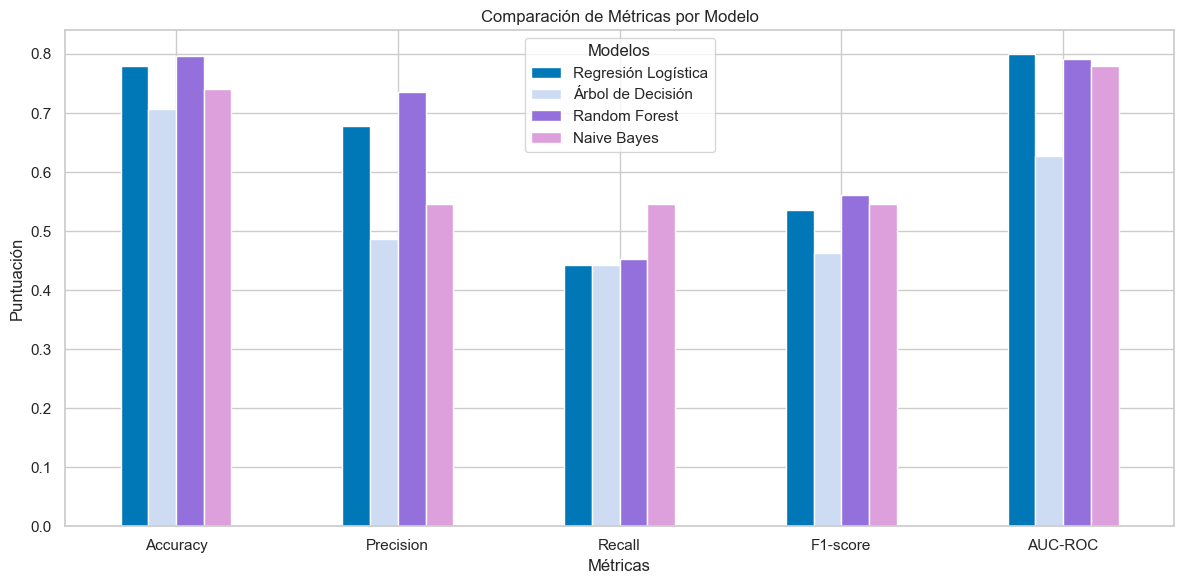

In [33]:
visualiza_resultados()